## Agrupamiento con K-Means

In [11]:
# Importar las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(iris.data)
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [14]:
iris_df['cluster'] = kmeans.labels_
iris_df.groupby(['target', 'cluster']).agg({'sepal length (cm)':'count'})

sepal length (cm)
target cluster                   
0      1                       50
1      0                       47
       2                        3
2      0                       14
       2                       36

In [16]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_res = pca.fit_transform(iris.data)
iris_df['X'] = pca_res[:,0]
iris_df['Y'] = pca_res[:,1]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster,X,Y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


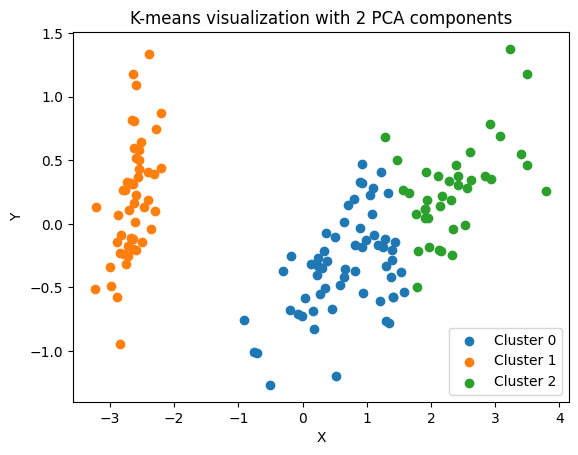

In [20]:
cluster_0 = iris_df[iris_df['cluster'] == 0]
cluster_1 = iris_df[iris_df['cluster'] == 1]
cluster_2 = iris_df[iris_df['cluster'] == 2]

plt.scatter(cluster_0['X'], cluster_0['Y'], label = 'Cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], label = 'Cluster 1')
plt.scatter(cluster_2['X'], cluster_2['Y'], label = 'Cluster 2')
plt.legend()
plt.title('K-means visualization with 2 PCA components')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()